In [33]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd

In [34]:
dirname = os.path.abspath(os.curdir) + '/data'

data = pd.read_csv(path.join(os.sep, dirname, 'Radioactivity in the ground at 2 hourly intervals over one year July 2.csv'), index_col=0)

print(data.head())

   dose_rate
1   0.099992
2   0.099169
3   0.103160
4   0.106554
5   0.101224


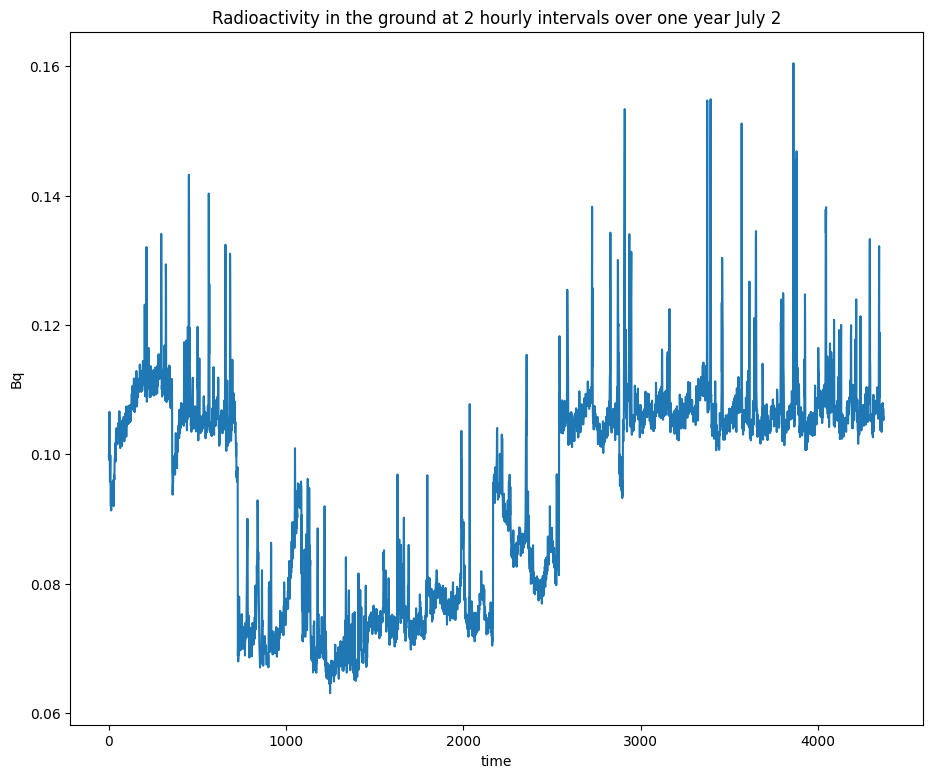

In [35]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.xlabel(xlabel)
    axp.ylabel(ylabel)
    axp.title(title1)

plot_assignation(plt, data["sales"], 'time', 'sales','Annual domestic sales and advertising of Lydia E Pinkham Medicine Comp')

plt.show()

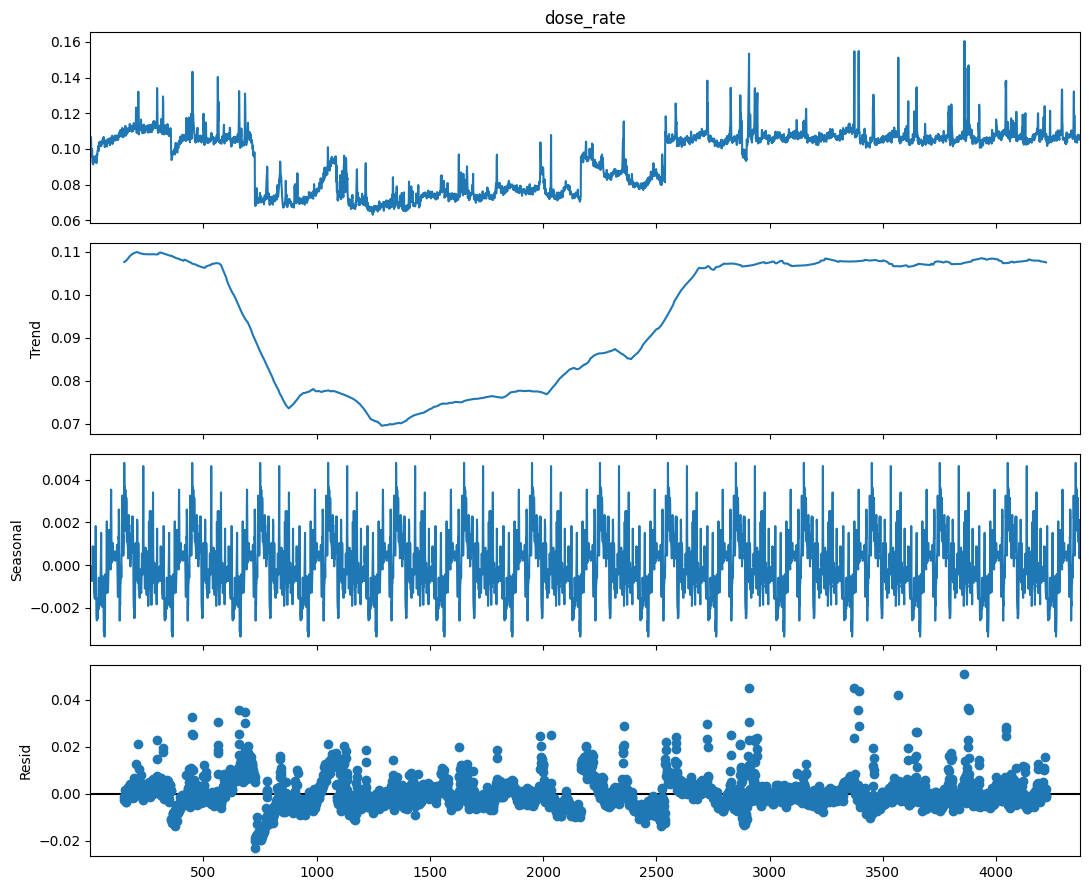

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(data["dose_rate"], period=300)
decompose.plot()

plt.show()

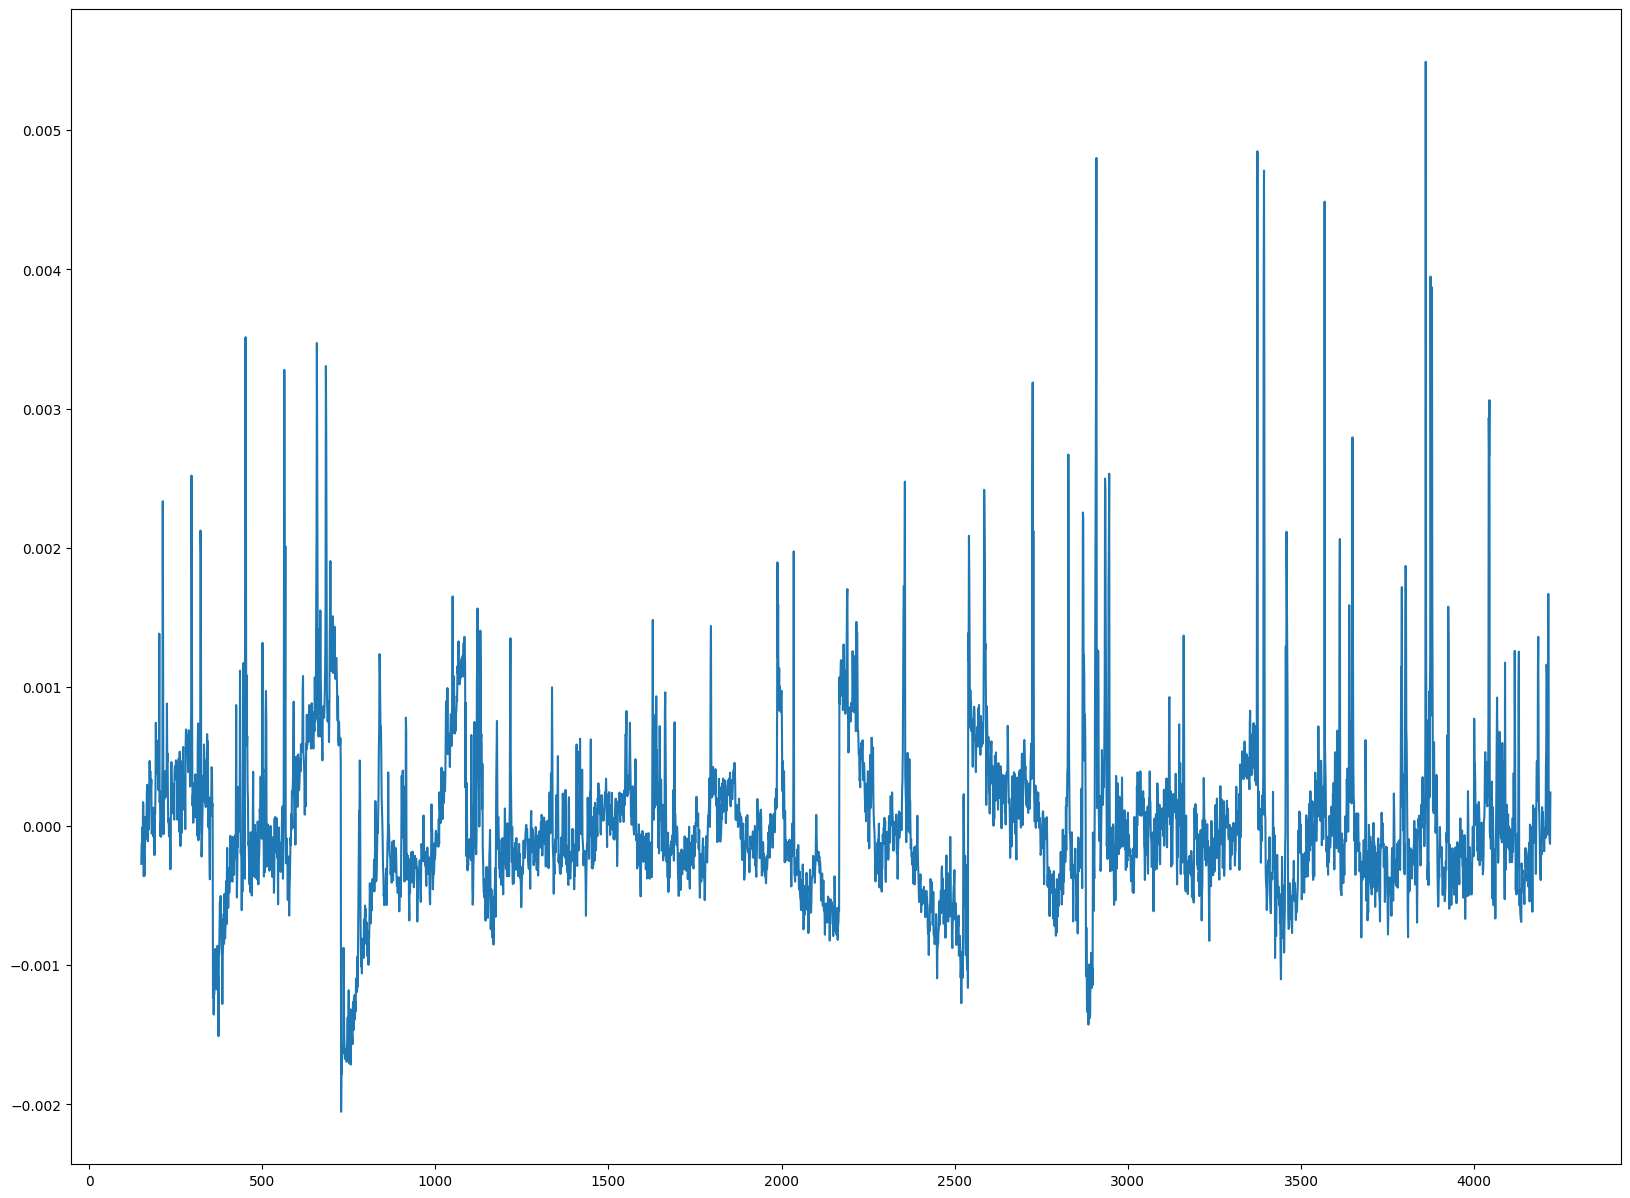

In [37]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))
 
plt.plot(new_ps)
plt.show()

<Axes: >

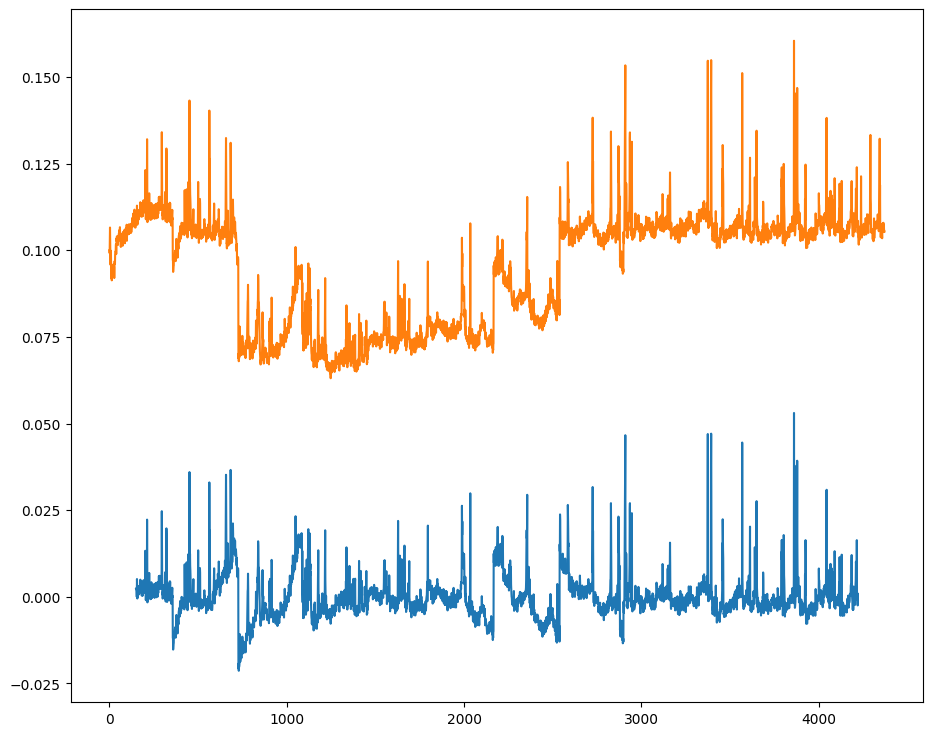

In [38]:
data_r = data["dose_rate"] - decompose.trend

data_r.plot()
data["dose_rate"].plot()

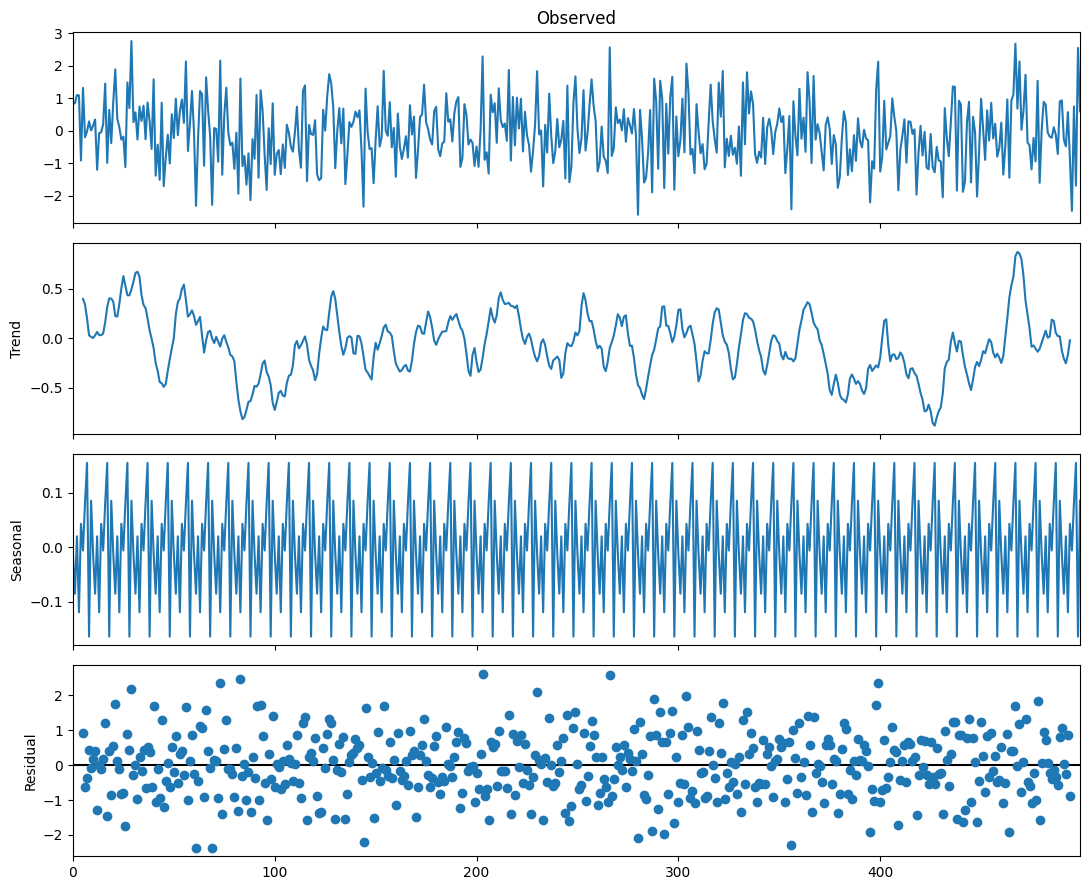

In [39]:
import numpy as np
white_noise = np.random.normal(0,1, 500)

decompose = seasonal_decompose(white_noise, period=10, model="additive")
decompose.plot()

plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Доза радиации"
ts = data["dose_rate"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Доза радиации :
Test Statistic                   -2.124279
p-value                           0.234865
#Lags Used                       25.000000
Number of Observations Used    4344.000000
Critical Value (1%)              -3.431856
Critical Value (5%)              -2.862206
Critical Value (10%)             -2.567124
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


C:\Users\elise\AppData\Local\Temp\ipykernel_17284\563606018.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


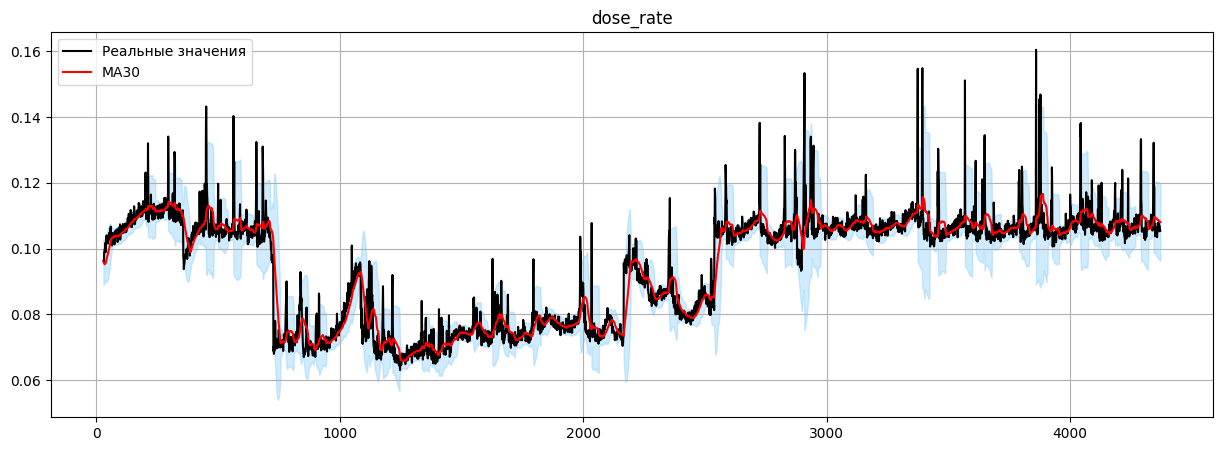

In [41]:
window = 30

rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")


lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')

plt.grid(True)
plt.show()

<Axes: title={'center': 'Time Series Analysis Plots'}>

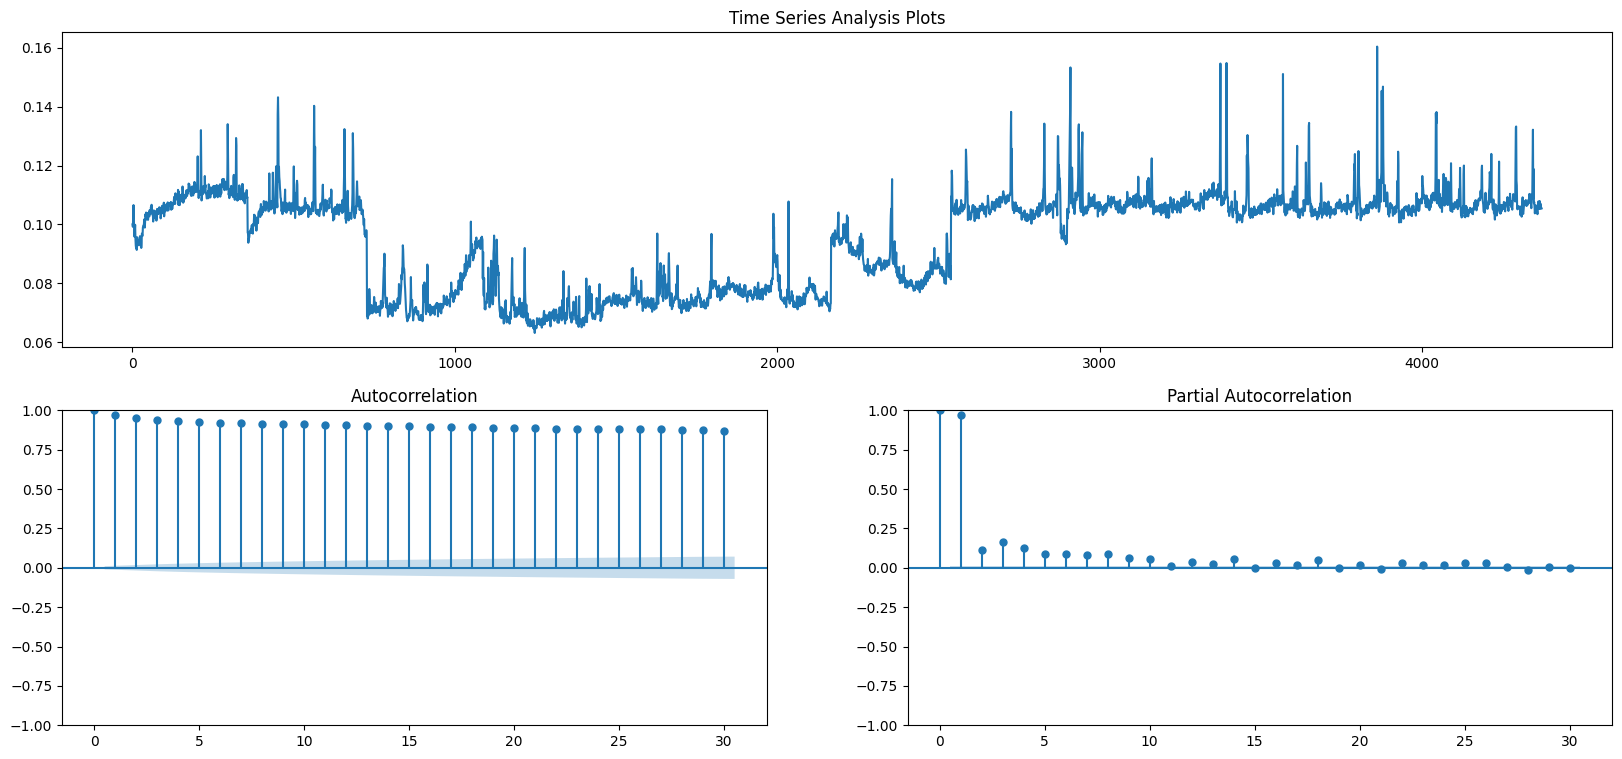

In [42]:
import statsmodels.tsa.api as smt

ts = data["dose_rate"]

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)

ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts_ax.set_title('Time Series Analysis Plots')

smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)

ts.plot(ax=ts_ax)